# 5번 

1. 아래 그래프는 A,B,C 자치구별 H 의원에 대한 찬성, 반대 투표 결과이다.자치구별 지지율이 같은지에 대해서 검정하라. 



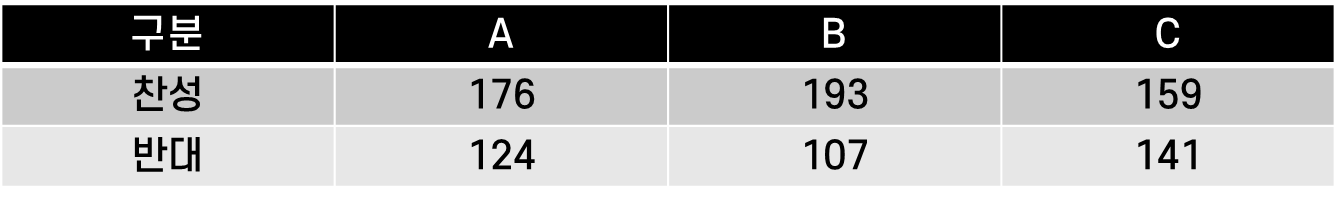


# 교차분석


<br>

## 카이제곱 검정이란? 

- 카이제곱(χ2) 분포에 기초한 통계 방법
- 설명변수가 <b>범주형 자료</b>인 경우 사용
- 각 범주에 따른 결과변수의 분포를 설명하거나, 범주형 변수가 두 개 이상인 경우 두 변수가 상관이 있는지를 검정함
- 기본가정 : 각 범주의 기대빈도가 5 이상이어야 함

<br>

<br>

## 교차분석 개념

- 범주형 자료(명목/서열 수준)인 두 변수 간의 관계를 알아보기 위해 실시하는 분석 기법
- 적합성 검정, 독립성 검정, 동질성 검정에 사용되며, 카이제곱 검정통계량을 이용함
- 교차분석은 교차표에서 각 셀의 관찰빈도와 기대빈도 간의 차이를 검정함
    - 관찰빈도 : 자료로부터 얻은 빈도분포
    - 기대빈도 : 두 변수가 독립일 때 이론적으로 기대할 수 있는 빈도분포

<br>


## 카이제곱 검정의 세 가지 검정

- 적합성 검정 : 각 범주에 따른 데이터의 빈도분포가 이론적으로 기대하는 분포를 따르는지를 검정함<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;ex. 주사위를 굴렸을 때, 각 주사위의 값이 1/6의 확률로 등장하는 게 맞는지 검정
- 독립성 검정 : 두 개 이상의 범주형 변수에 대해서, 그 변수들의 관계에 따라 값들의 분포가 유의미한 차이를 보이는지 검정함<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;ex. 고객의 지역과 보험 가입 여부가 주어졌을 때 지역에 따른 보험 가입 비율의 차이가 존재하는지 검정
- 동질성 검정 : 부모집단의 관측값들이 정해진 범주 내에서 서로 비슷하게 나타나고 있는지를 검정<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;ex. 남학생의 TV 프로그램 선호도와 여학생의 TV프로그램 선호도가 동일한지 검정

### 동질성 검정과 독립성 검정의 차이
- 동질성 검정은 범주 A에 대해 범주B의 유형들이 같은 빈도로 나타는지를 검정하는 것 
- 독립성 검정은 독립적인지 (혹은 상관성이 있는지)를 검정하는 것 


### 5번 문제는 두개 이상의 범주형 변수에 대해서 변수들 간의 관계에 따라 분포의 차이를 보는 것이므로 독립성 검정을 시행해야함 

- 모집단이 두 개의 변수 A, B에 의해 범주화되었을 때, 이 두 변수들 사이의 관계가 독립인지 아닌지 검정하는 것
- 교차표를 활용함

> scipy.stats.chi2_contingency(observed)<br>
> observed : 교차표 (각 범주에서의 발생 횟수 표)<br>


<br><b>[가설]</b>


<span style='color: #CD5C5C'> - 귀무가설 : 자치구와 지지율은 독립이다 </span><br>
<span style='color: #CD5C5C'> - 대립가설 : 자치구와 지지율은 독립이 아니다 </span>

In [1]:
import pandas as pd 
import numpy as np 
data = pd.DataFrame({"vote" :["찬성","반대"],
                    "A" : [176,124],
                    "B" : [193,107],
                    "C" : [159,141]})
data

,vote,A,B,C
0,찬성,176,193,159
1,반대,124,107,141


In [2]:
data.set_index("vote",inplace=True) ## 교차표를 만들어 주기 위해 인덱스 설정 
data

,A,B,C
vote,,,
찬성,176,193,159
반대,124,107,141


In [3]:
# 카이제곱 검정을 통한 독립성 검정 수행
from scipy.stats import chi2_contingency

chi, p, df, expect = chi2_contingency(data) 

print('Statistic:', chi)
print('p-value:', p)
print('df:', df)
print('expect: \n', expect)

print("\n p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각")
print("\n 자치구와 지지율은 독립이 아니라고 할 수 있다. 즉, 자치구별 H의원에 대한 지지율은 다르다.")

Statistic: 7.945381231671554
p-value: 0.01882272023214683
df: 2
expect: 
 [[176. 176. 176.]
 [124. 124. 124.]]

 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각

 자치구와 지지율은 독립이 아니라고 할 수 있다. 즉, 자치구별 H의원에 대한 지지율은 다르다.
